# Relaxing twisted structure with LAMMPS

## 1. Install LAMMPS with pair_allegro.

Before relaxing structures with LAMMPS, you need to install [LAMMPS](https://docs.lammps.org/Manual.html) with pair_allegro. See [pair_allegro](https://github.com/mir-group/pair_allegro).

Assume you have sucessfully installer LAMMPS with pair_allegro, you could verify with:

In [1]:
%%bash
lmp -h


Large-scale Atomic/Molecular Massively Parallel Simulator - 2 Aug 2023 - Update 3

Usage example: lmp -var t 300 -echo screen -in in.alloy

List of command line options supported by this LAMMPS executable:

-echo none/screen/log/both  : echoing of input script (-e)
-help                       : print this help message (-h)
-in none/filename           : read input from file or stdin (default) (-i)
-kokkos on/off ...          : turn KOKKOS mode on or off (-k)
-log none/filename          : where to send log output (-l)
-mdi '<mdi flags>'          : pass flags to the MolSSI Driver Interface
-mpicolor color             : which exe in a multi-exe mpirun cmd (-m)
-cite                       : select citation reminder style (-c)
-nocite                     : disable citation reminder (-nc)
-nonbuf                     : disable screen/logfile buffering (-nb)
-package style ...          : invoke package command (-pk)
-partition size1 size2 ...  : assign partition sizes (-p)
-plog basename      

## 2. Translate structures

Firstly, we should translate structure to lammps data format.

In [2]:
from ase.io.vasp import read_vasp
from ase.io.lammpsdata import write_lammps_data

rigid_structure = read_vasp(f"7.34_rigid.vasp")
write_lammps_data(f"7.34_rigid.dat", rigid_structure, atom_style="atomic", specorder=["Mo", "S"], masses=True)

## 2. Relaxation

Next, run the following command to relax provided 7.34° AA tMoS $_2$.

In [16]:
%%bash
lmp -in lmp.in

LAMMPS (2 Aug 2023 - Update 3)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  triclinic box = (0 0 0) to (24.639964 21.338836 30) with tilt (-12.319982 -2.311096e-08 1.5983935e-07)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  366 atoms
  read_data CPU = 0.004 seconds
Allegro is using input precision f and output precision f
Allegro: Loading model from MoS2_AA.pth
Allegro: Freezing TorchScript model...
Type mapping:
Allegro type | Allegro name | LAMMPS type | LAMMPS name
0 | S | 2 | S
1 | Mo | 1 | Mo
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 3000, page size: 100000
  master list distance cutoff = 10.448822
  ghost atom cutoff = 10.448822
  binsize = 5.2244108, bins = 8 5 6
  1 neighbor lists, perpetual

## 3. Results translation & visualization

The relaxed structure will be stored in `7.34_relaxed.dat`. Let's translate it to POSCAR format and take a view at the relaxation pattern.

### 3.1 Translate results

In [3]:
from ase.io.lammpsdata import read_lammps_data
from ase.io.vasp import write_vasp

relaxed_structure = read_lammps_data("7.34_relaxed.dat", sort_by_id=True)
write_vasp("7.34_relaxed.vasp", relaxed_structure)

### 3.2 Visualization

6.6 6.3


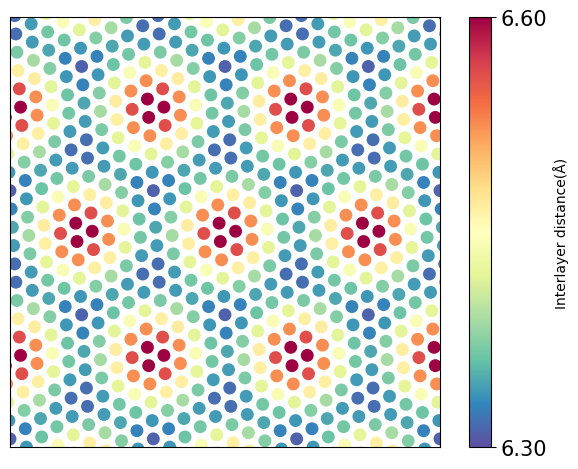

In [4]:
from DPmoire.utils.graph_plot import plot_disp_in_plane, plot_distance_z
from matplotlib import pyplot as plt
ax = plot_distance_z(relaxed_structure, 6, "Mo", vrange=(6.30, 6.60))
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

0.023300203028284613 0


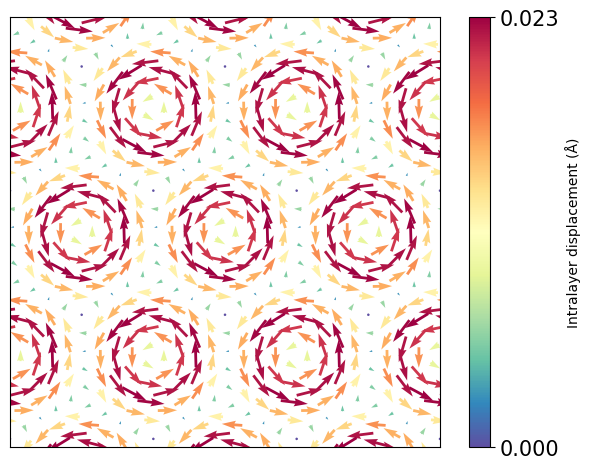

In [5]:
ax = plot_disp_in_plane(rigid_structure, relaxed_structure, 6, "Mo", )
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()